In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
l = 1
r = 0.1
m = 1
I1 = m*(3*r**2+l**2)/12
g = 9.81

In [9]:
theta0 = np.pi/10


omega = 0


angles  = np.array([theta0])
theta = theta0


M1 = 0*2*m*g*l*np.sin(theta0)/4.0

dt = 0.0001
t = np.arange(0, 3, dt)

for i in t[1:]:
    dtheta = omega
    domega = (-2*m*g*l*np.sin(theta) +4*M1)/(4*I1+m*l**2)
    
    theta = theta + dt*dtheta
    omega = omega + dt*domega
    
    angles = np.vstack((angles, [theta]))
    
    

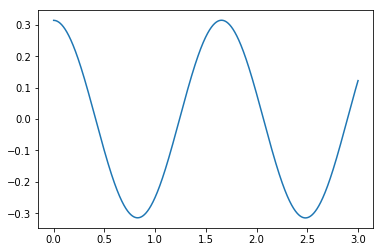

In [10]:
plt.figure()
plt.plot(t,angles)
plt.show()

In [17]:
rcm = l/2*np.hstack(((np.sin(angles[:,0])*0).reshape(angles.shape[0],1),
                    (np.sin(angles[:,0])).reshape(angles.shape[0],1),
                    (-np.cos(angles[:,0])).reshape(angles.shape[0],1)))

In [19]:
m1 = rcm 
m2 = np.zeros_like(rcm)
m3 = rcm + r*np.hstack(((np.cos(angles[:,0])*0).reshape(angles.shape[0],1),
                        (np.cos(angles[:,0])).reshape(angles.shape[0],1),
                         np.sin(angles[:,0]).reshape(angles.shape[0],1)))


In [23]:
l = 1
r = 0.1
m = 1
I1 = m*r**2/2
I2 = m*(3*r**2+l**2)/12
I3 = m*(3*r**2+l**2)/12

I = np.array([[I1,0,0],[0,I2,0], [0,0,I3]])

dt = t[1]-t[0]

rcm = m1
vcm = np.diff(rcm, axis = 0)/dt
acm = np.diff(vcm, axis = 0)/dt
    

F = np.zeros_like(m1)
Mo = np.zeros_like(F)
MoBar = np.zeros_like(F)
e1 = np.zeros_like(F)
e2 = np.zeros_like(F)
e3 = np.zeros_like(F)
thetaGlobal = np.zeros_like(F)
thetaLocal = np.zeros_like(F)


for i in range(acm.shape[0]):
    e1[i,:] = m1[i,:] - m2[i,:]
    e1[i,:] = e1[i,:]/np.linalg.norm(e1[i,:])
    
    e2[i,:] = m3[i,:] - m1[i,:]
    e2[i,:] = e2[i,:]/np.linalg.norm(e2[i,:])
    
    e3[i,:] = np.cross(e1[i,:],e2[i,:])
    
de1dt = np.diff(e1[0:-1,:], axis=0)/(2*dt) + np.diff(e1[1:,:], axis=0)/(2*dt)
de2dt = np.diff(e2[0:-1,:], axis=0)/(2*dt) + np.diff(e2[1:,:], axis=0)/(2*dt)
de3dt = np.diff(e3[0:-1,:], axis=0)/(2*dt) + np.diff(e3[1:,:], axis=0)/(2*dt)

omega = np.hstack((np.sum(de2dt*e3[0:de2dt.shape[0],:], axis=1).reshape(de2dt.shape[0],1),
                   np.sum(de3dt*e1[0:de1dt.shape[0],:], axis=1).reshape(de2dt.shape[0],1),
                   np.sum(de1dt*e2[0:de2dt.shape[0],:], axis=1).reshape(de2dt.shape[0],1)))

alpha = np.diff(omega[0:-1,:], axis=0)/(2*dt) + np.diff(omega[1:,:], axis=0)/(2*dt)

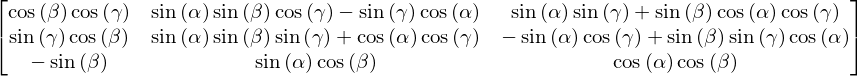

In [70]:
import sympy as sym
sym.init_printing()

alpha1, beta1, gamma1 = sym.symbols('alpha, beta, gamma')

Ra = sym.Matrix([[1,0,0],[0,sym.cos(alpha1), -sym.sin(alpha1)],[0,sym.sin(alpha1), sym.cos(alpha1)]])
Rb = sym.Matrix([[sym.cos(beta1),0, sym.sin(beta1)],[0,1,0],[-sym.sin(beta1),0 ,sym.cos(beta1)]])
Rg = sym.Matrix([[sym.cos(gamma1), -sym.sin(gamma1),0],[sym.sin(gamma1), sym.cos(gamma1),0],[0,0,1]])

Rg*Rb*Ra

In [53]:
for i in range(alpha.shape[0]):
         R = np.vstack((e1[i,:].reshape(1,3),
                        e2[i,:].reshape(1,3),
                        e3[i,:].reshape(1,3))) 
        
         F[i,:] = m*np.array([0,0,9.81]) + m*acm[i,:]
         
         alphaGlobal = np.arctan2(-R[1,2],R[2,2])   
         betaGlobal = np.arctan2(R[0,2], np.sqrt(R[1,2]**2+R[2,2]**2))   
         gammaGlobal = np.arctan2(-R[0,1],R[0,0])
         
         thetaGlobal[i,:] = np.array([alphaGlobal, betaGlobal, gammaGlobal])  
            
         r0cm = -rcm[i,:]
         MF = -np.cross(r0cm, F[i,:])
            
         MFBar = R.dot(MF.reshape(3,1)).reshape(1,3)
           
         MoBar[i,:] = np.array([I1*alpha[i,0] + omega[i,1]*omega[i,2]*(I3-I2) + MFBar[0,0],
                                I2*alpha[i,1] + omega[i,0]*omega[i,2]*(I1-I3) + MFBar[0,1],
                                I3*alpha[i,2] + omega[i,0]*omega[i,1]*(I2-I1) + MFBar[0,2]])
         
         Mo[i,:] = (R.T).dot(MoBar[i,:].T)   
         
         

In [54]:
Mo

array([[1.28293152e-08, 0.00000000e+00, 0.00000000e+00],
       [6.91487140e-08, 0.00000000e+00, 0.00000000e+00],
       [1.19596670e-07, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [55]:
omega

array([[ 0.00000000e+00,  0.00000000e+00, -2.25666753e-04],
       [ 0.00000000e+00,  0.00000000e+00, -6.77000259e-04],
       [ 0.00000000e+00,  0.00000000e+00, -1.12833373e-03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.10404834e+00],
       [ 0.00000000e+00,  0.00000000e+00, -7.95807864e-13],
       [ 0.00000000e+00,  0.00000000e+00, -2.27373675e-13]])

In [56]:
alpha

array([[ 0.00000000e+00,  0.00000000e+00, -4.51333490e+00],
       [ 0.00000000e+00,  0.00000000e+00, -4.51333428e+00],
       [ 0.00000000e+00,  0.00000000e+00, -4.51333302e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -1.77433989e+00],
       [ 0.00000000e+00,  0.00000000e+00, -5.52112928e+03],
       [ 0.00000000e+00,  0.00000000e+00, -5.52024171e+03]])

In [57]:
thetaGlobal

array([[-1.57079633, -1.25663706, -1.57079633],
       [-1.57079633, -1.25663706, -1.57079633],
       [-1.57079633, -1.25663711, -1.57079633],
       ...,
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

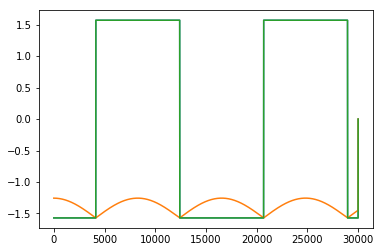

In [59]:
plt.plot(thetaGlobal)

In [60]:
R

array([[ 0.        ,  0.12159433, -0.99257988],
       [ 0.        ,  0.99257988,  0.12159433],
       [ 1.        , -0.        ,  0.        ]])